In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import matplotlib.animation as animation
%matplotlib inline

In [14]:
L = 250
N = 100
x = np.arange(-int(L/2), int(L/2), 1)
y = np.arange(-int(L/2), int(L/2), 1)
delta_theta = np.zeros(N)
v = np.ones(N)*0.3

##x represents coordinates, v has the components of the velocity (probably superfluous, psi is the orientation, omega is the 
##angular velocity and r is the radius.
particles_x = np.zeros([N, 2])
particles_v = np.zeros([N, 2])
particles_omega = np.zeros(N)
particles_psi = np.random.uniform(-np.pi/4, np.pi/4, N)
particles_r = np.zeros(N)

In [15]:
for i in range (int(N/10)):
    particles_x[10*i:(10*(i+1)), 0] = np.arange(0, 10, 1) + np.random.uniform(-0.1, 0.1, 10)
    particles_x[int(N*i/10): int(N*(i+1)/10), 1] = i + np.random.uniform(-0.1, 0.1, int(N/10))

particles_r[:] = np.random.normal(1, 0.1, N)

In [24]:
def calcDTheta (N, particles_x, selectMatrix):
    theta_out = np.zeros(N)
    theta_in = np.zeros(N)
    d_theta = np.zeros(N)
    
    particles_dist = particles_x[None, :, :] - particles_x[:, None, :]
    
    ##we need to avoid dividing by zero
    np.fill_diagonal(particles_dist[:, :, 0], 100)
    
    angles = selectMatrix*np.arctan2(particles_dist[:, :, 1], particles_dist[:, :, 0])
    
    for i in range (N):
        M = max(angles[i, :])
        m = min(angles[i, :])
        if M > 0 and m < 0:
            if M - m < np.pi:
                theta_in[i] = (M-m)/2
                theta_out[:] = 2*np.pi - 2*theta_in
                d_theta = particles_psi - theta_in
        elif (M > 0 and m > 0) or (M < 0 and m < 0):
            theta_in[i] = (M+m)/2
            theta_out[:] = 2*np.pi - 2*theta_in
            d_theta = particles_psi - theta_in
    
    return theta_in, theta_out, d_theta

def forceCalc(v, theta_out, d, particles_psi, particles_omega, selectMatrix, d_theta):
    psi_diff = (particles_psi[None, :] - particles_psi[:, None])*selectMatrix
    
    
    F = 0.07 #+ (theta_out[:] - np.pi)*0.3*(theta_out[:] > np.pi) - 1*np.sum(d[:], axis =1)
    F_x = 0.07#F*np.cos(particles_psi[:])
    F_y = 0.0 #F*np.sin(particles_psi[:])
    
    T = 0
    #T = 0.06*d_theta*(theta_out[:] > np.pi) + 0.03*np.random.uniform(-1,1, N) + 0.67*np.sum(psi_diff, axis = 1)[:]
    
    return F_x, F_y, F, T
    
def update(N, L, v, particles_x, particles_r, particles_psi, particles_omega):
    ##distances calculation
    d = np.linalg.norm(particles_x[None, :, :] - particles_x[:, None, :], axis = 2)
    
    selectMatrix = np.zeros([N, N])
    selectMatrix[d > 2.7] = 0
    selectMatrix[d > 0] = 1 ##the selection matrix is used to only take into account the neighbours with d < 2.7
    
    ##OPTIMIZATION NEEDED
    for i in range (0, N):
        for j in range (0, N):
            d[i, j] -= (particles_r[i] + particles_r[j])
            
    d[d>0] = 0
    d= -d
    

    ##calculations
    theta_in, theta_out, d_theta= calcDTheta(N, particles_x, selectMatrix)
    
    F_x, F_y, v, T = forceCalc(v, theta_out, d, particles_psi, particles_omega, selectMatrix, d_theta)
    
    particles_psi[:] = np.mod(particles_psi[:] + particles_omega[:], 2*np.pi)
    
    particles_psi[particles_psi > np.pi] -= 2*np.pi
    particles_psi[particles_psi < np.pi] += 2*np.pi
    
    particles_x[:, 0] = np.mod(particles_x[:, 0] + 0.07, L)
    particles_x[:, 1] = np.mod(particles_x[:, 1] + 0, L)
    particles_omega[:] = - (particles_psi[:] - T*1)
    
    
    
    order = np.abs(np.sum(particles_psi))/N
    
    return v, F_x, F_y, particles_x, particles_psi, particles_omega, order

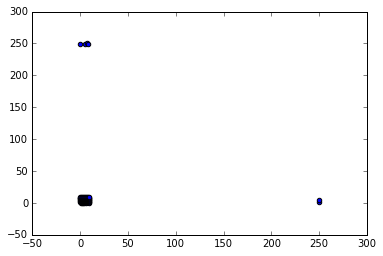

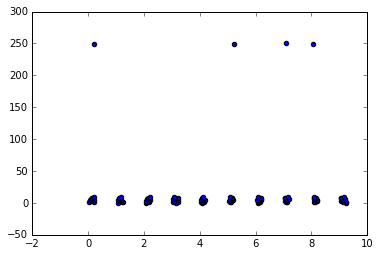

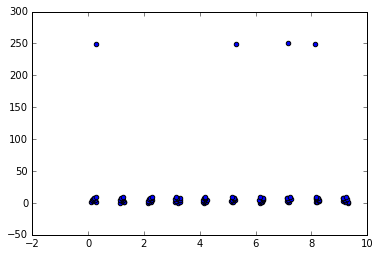

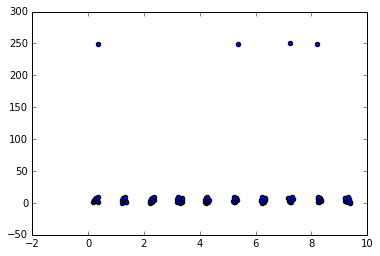

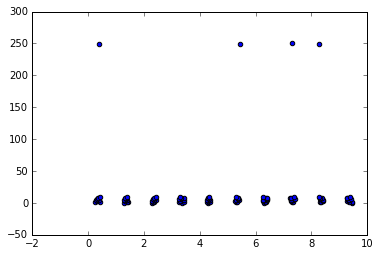

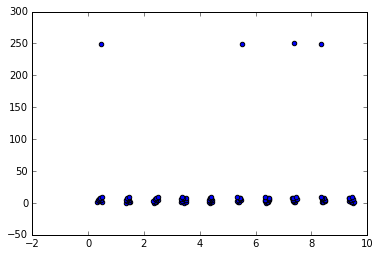

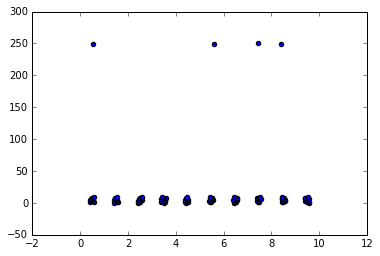

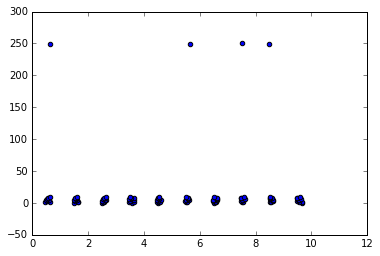

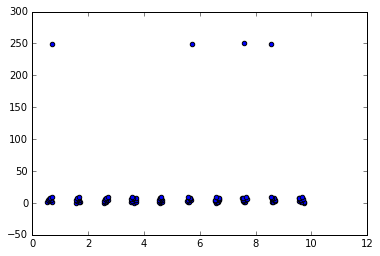

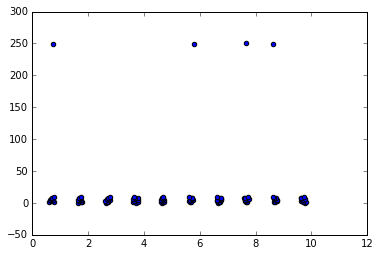

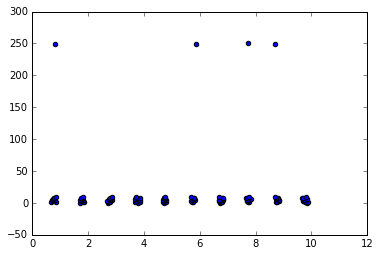

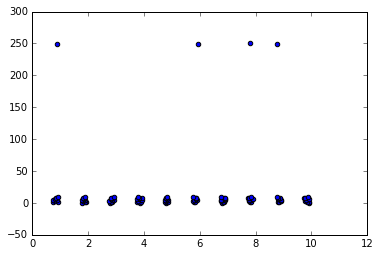

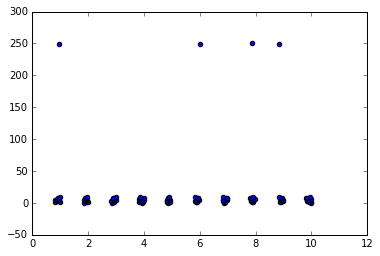

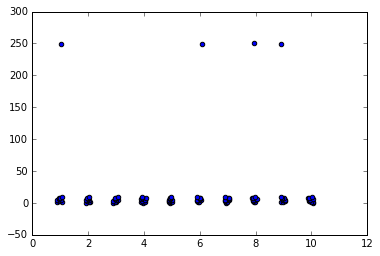

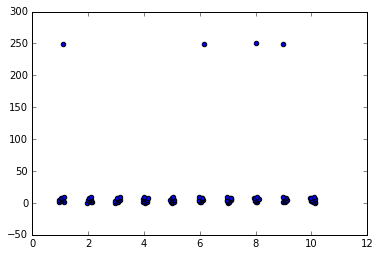

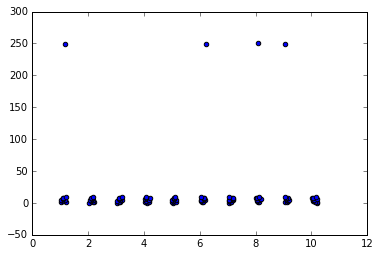

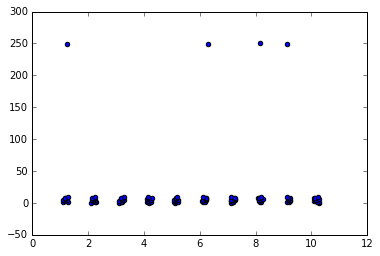

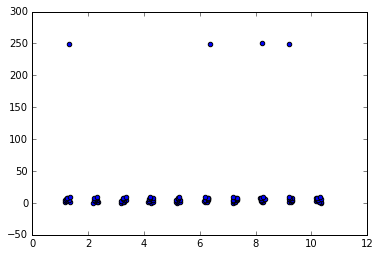

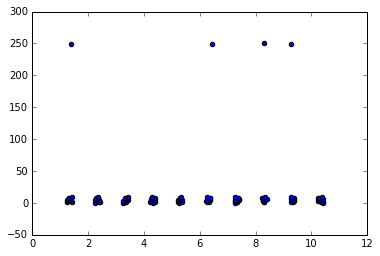

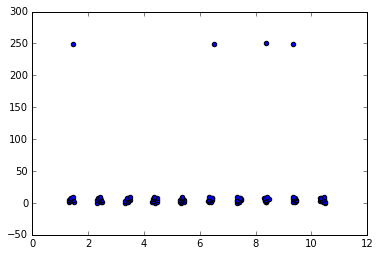

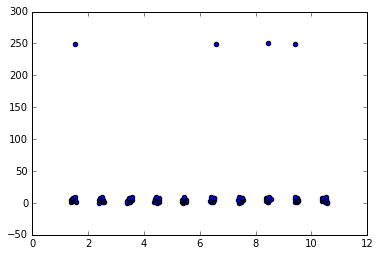

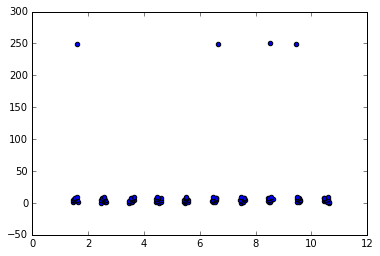

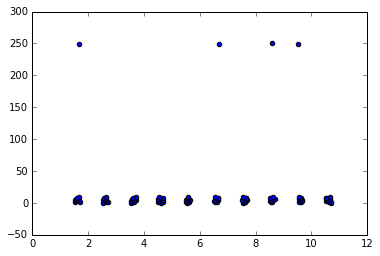

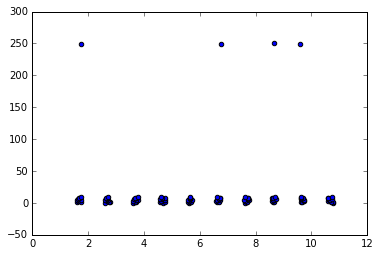

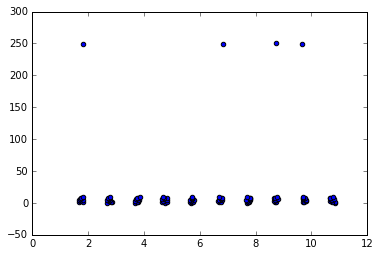

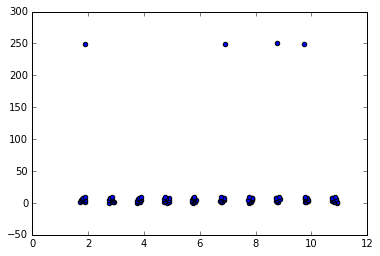

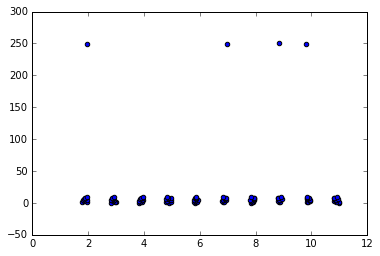

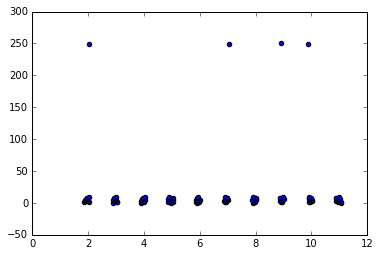

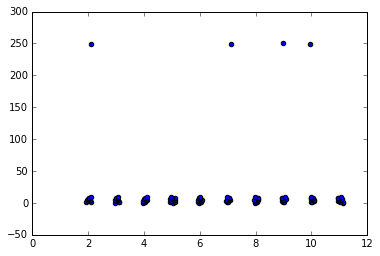

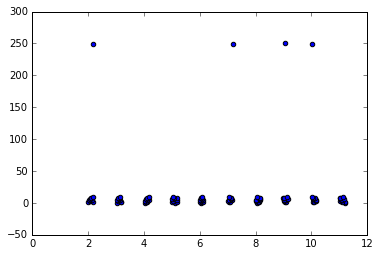

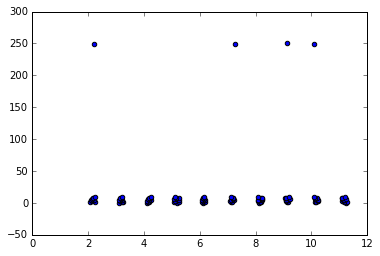

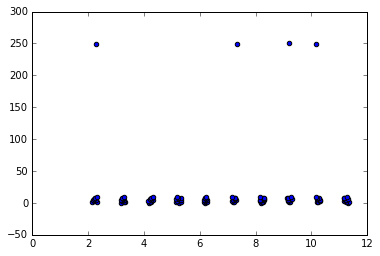

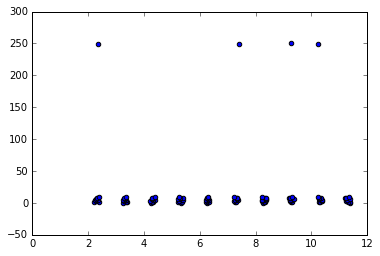

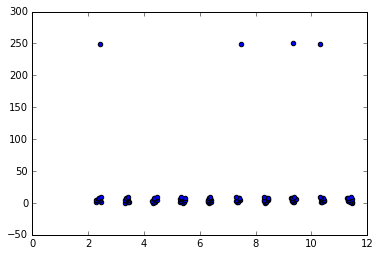

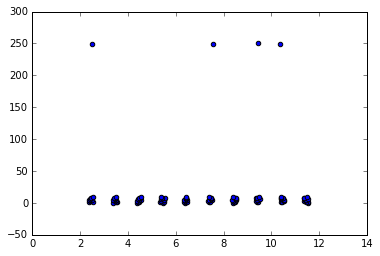

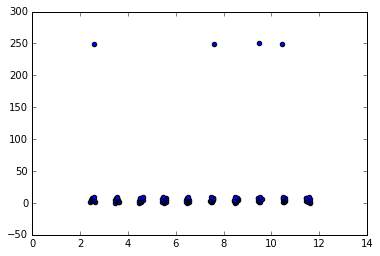

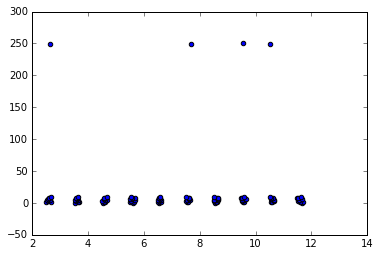

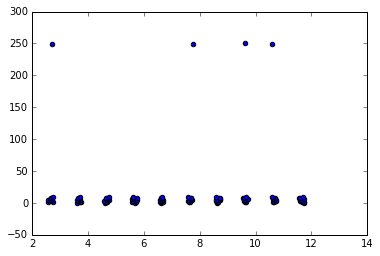

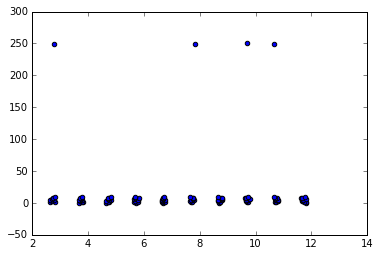

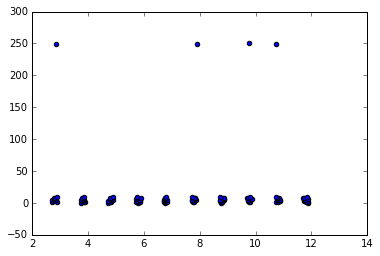

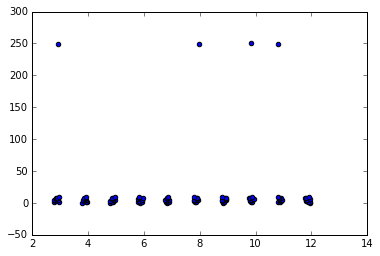

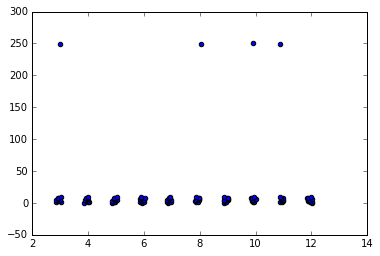

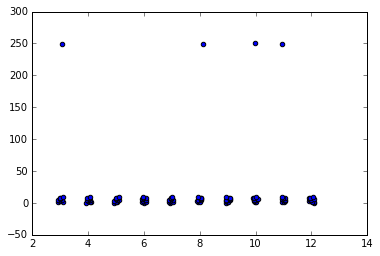

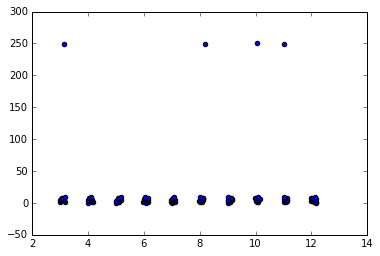

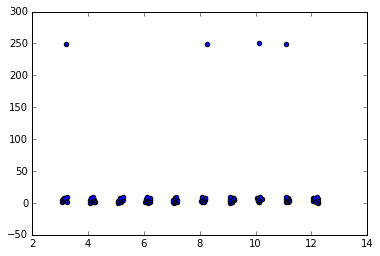

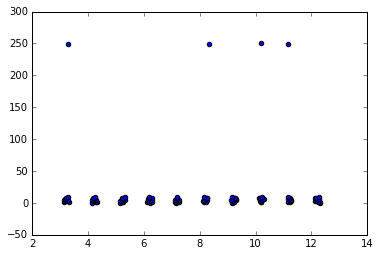

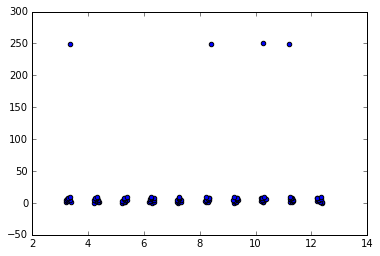

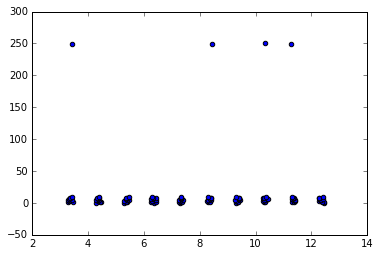

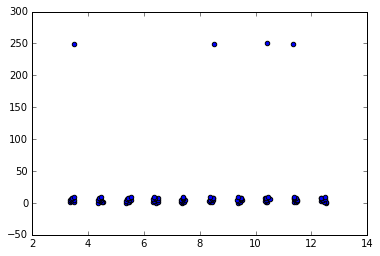

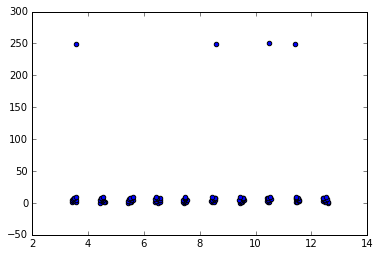

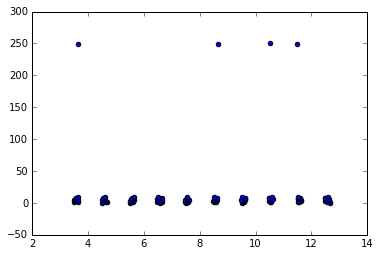

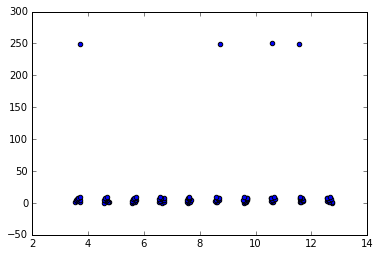

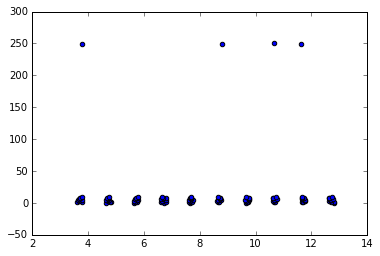

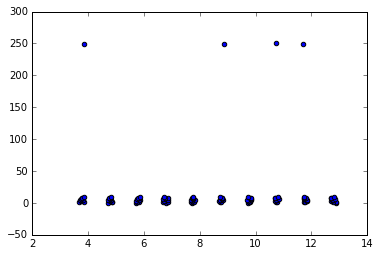

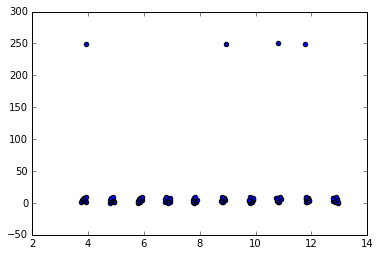

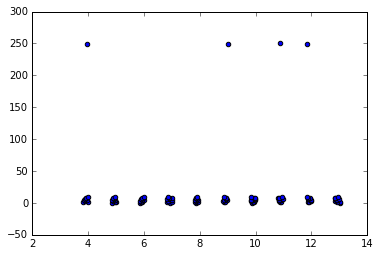

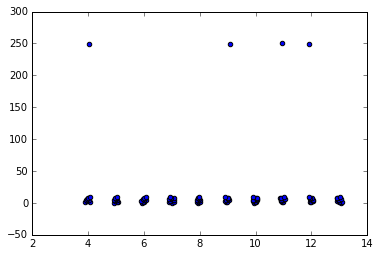

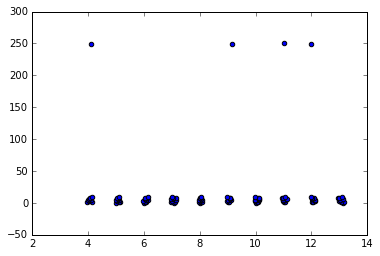

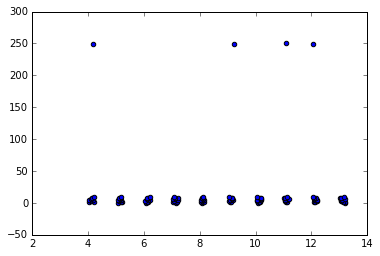

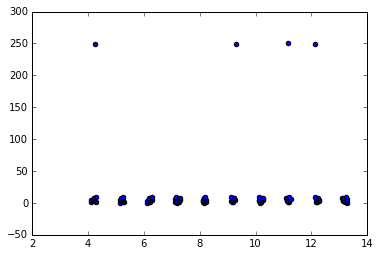

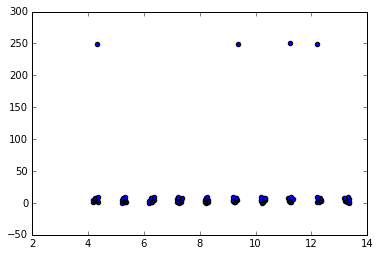

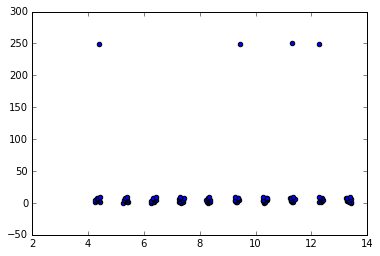

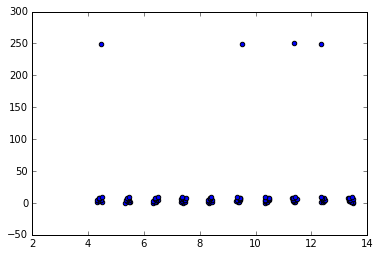

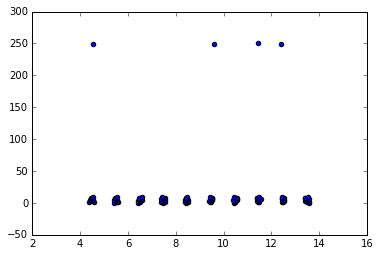

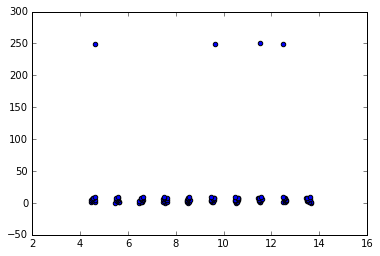

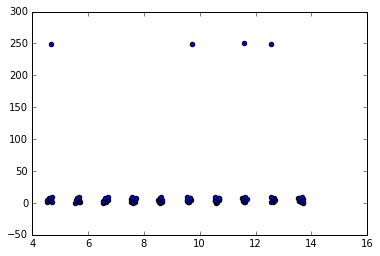

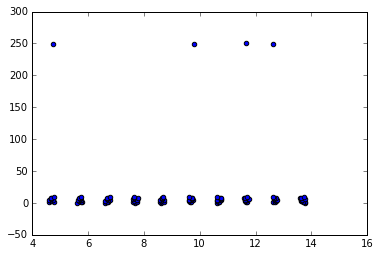

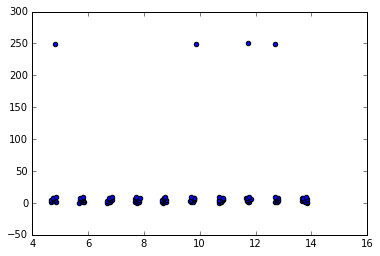

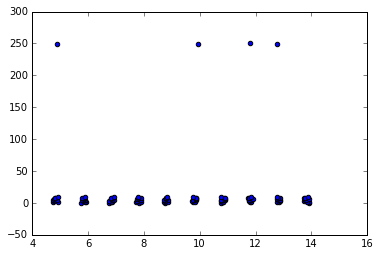

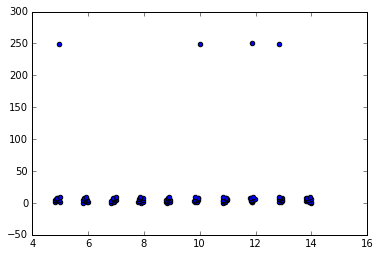

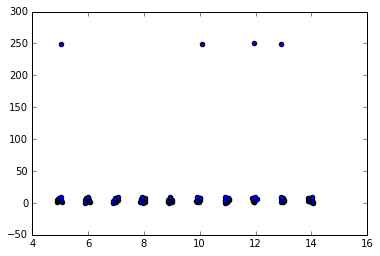

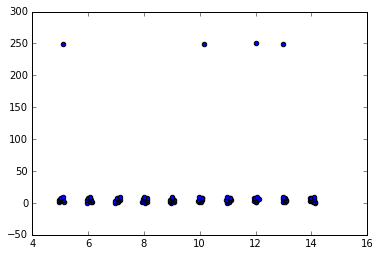

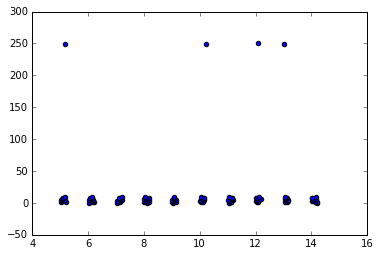

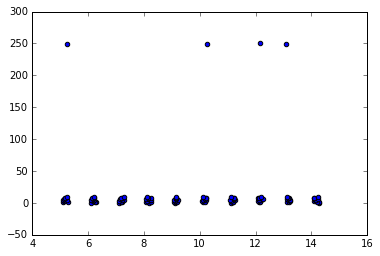

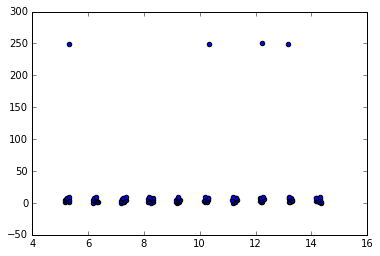

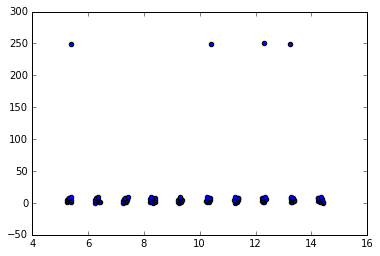

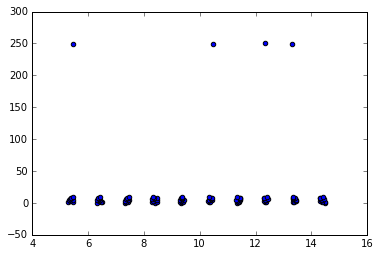

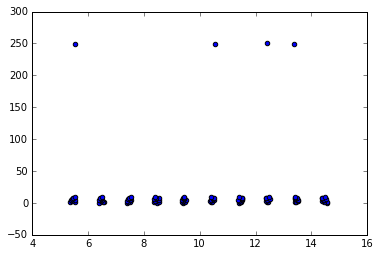

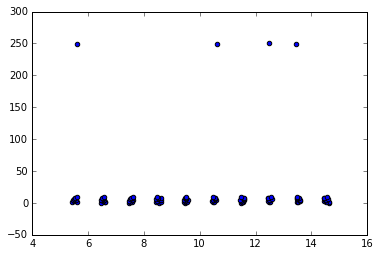

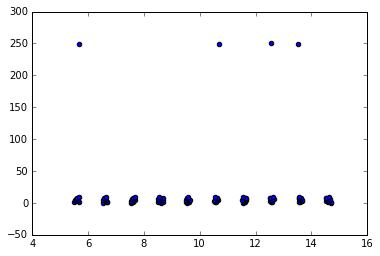

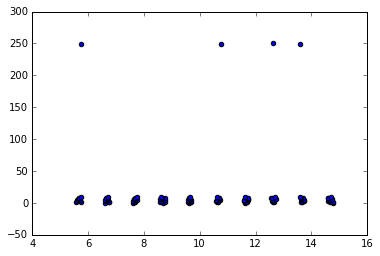

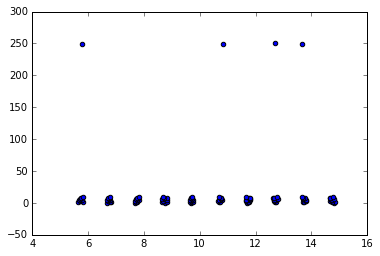

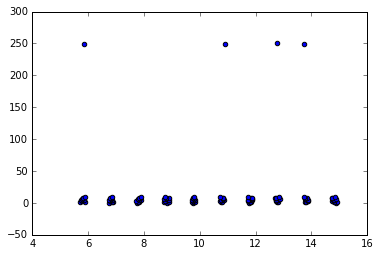

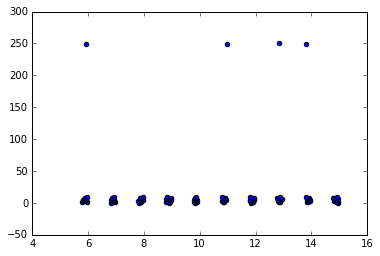

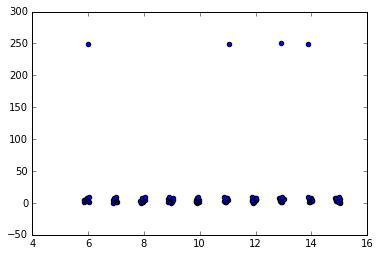

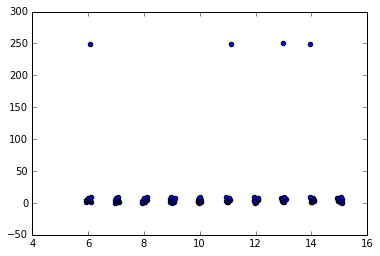

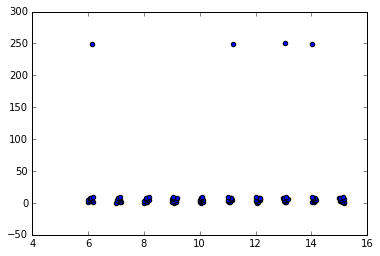

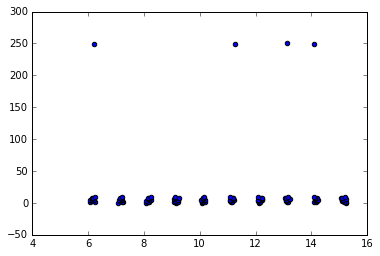

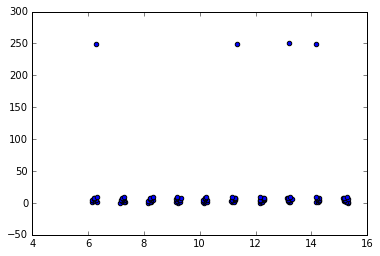

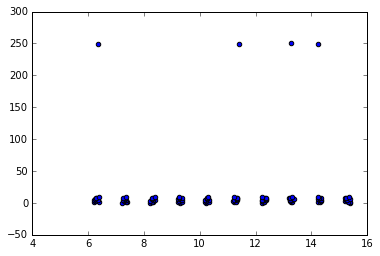

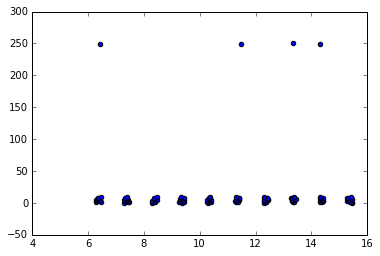

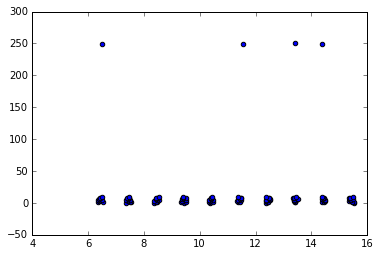

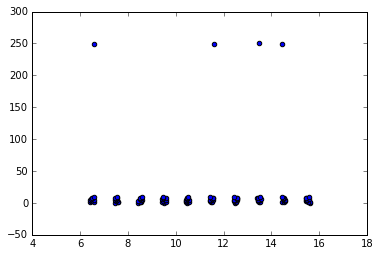

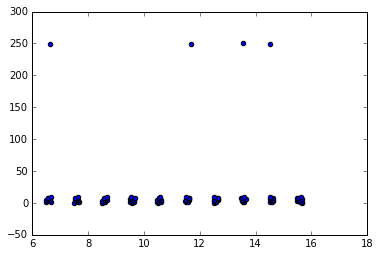

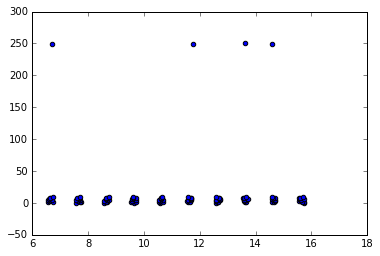

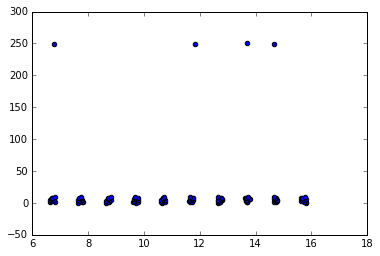

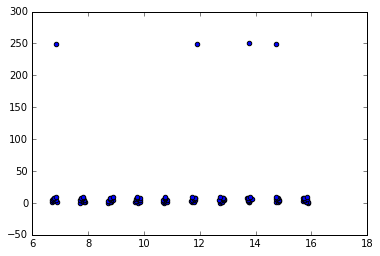

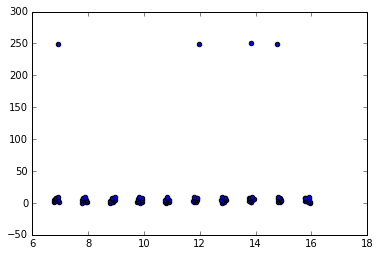

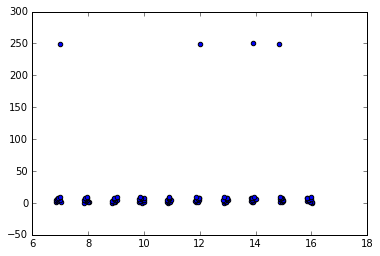

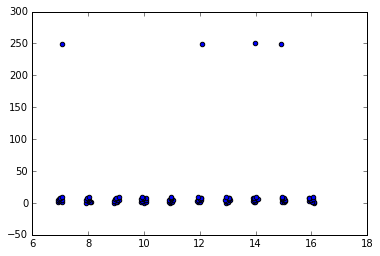

In [25]:
for i in range (0, 100):
    v, F_x, F_y, particles_x, particles_psi, particles_omega, orderTemp = update(N, L, v, particles_x, particles_r, particles_psi, particles_omega)
    plt.scatter(particles_x[:, 0], particles_x[:, 1])
    plt.show()

In [ ]:
sizes = np.pi *particles_r
orderValues = np.zeros([20000])
for i in range (30000):
    v, F_x, F_y, particles_x, particles_psi, particles_omega, orderTemp = update(N, L, v, particles_x, particles_r, particles_psi, particles_omega)
    print(i)
    if i > 10000:
        orderValues[i-10000] = orderTemp

In [ ]:
plt.scatter(np.arange(0, 20000, 1), orderValues[:])
plt.show()

In [ ]:
print(orderValues)

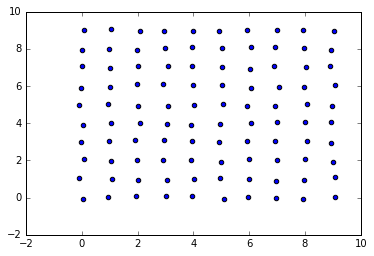

In [17]:
plt.scatter(particles_x[:, 0], particles_x[:, 1])
plt.show()